## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import shapiro
from scipy.stats import skew
from sklearn.decomposition import PCA

In [2]:
petrol=pd.read_csv("petrol.csv")
petrol.head(10)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


In [3]:
petrol.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [4]:
petrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
tax             48 non-null float64
 income         48 non-null int64
 highway        48 non-null int64
 dl             48 non-null float64
 consumption    48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [5]:
petrol.isna().sum()

tax             0
 income         0
 highway        0
 dl             0
 consumption    0
dtype: int64

In [6]:
## there is no null values

In [7]:
a=petrol["tax"].value_counts()

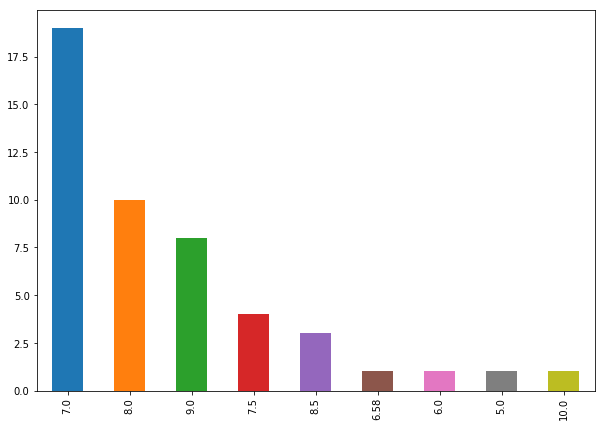

In [8]:
import matplotlib.cm as cm
a.plot(kind="bar",figsize=(10,7))
plt.show()

In [9]:
a

7.00     19
8.00     10
9.00      8
7.50      4
8.50      3
6.58      1
6.00      1
5.00      1
10.00     1
Name: tax, dtype: int64

tax


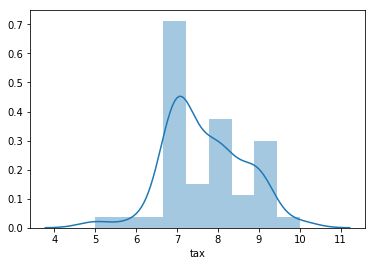

 income


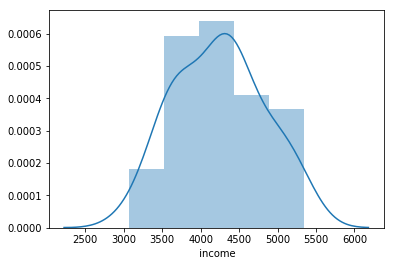

 highway


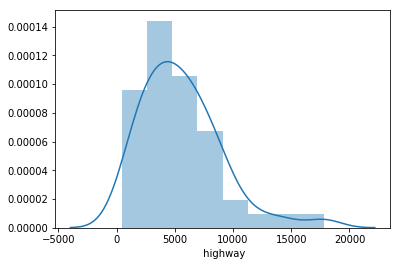

 dl


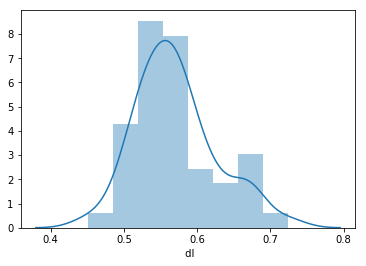

 consumption


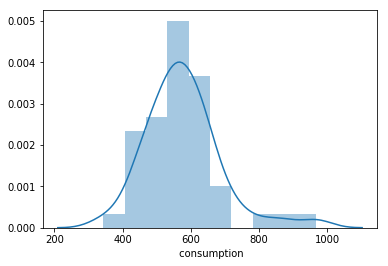

In [10]:
for i in petrol.columns:
    print(i)
    sb.distplot(petrol[i])
    plt.show()

In [11]:
for i in petrol.columns:
    
    print(i)
    print(shapiro(petrol[i]))
    print("********")

tax
(0.9098409414291382, 0.0013274250086396933)
********
 income
(0.9752295017242432, 0.3987608253955841)
********
 highway
(0.9249720573425293, 0.004471076652407646)
********
 dl
(0.9609872102737427, 0.11067605018615723)
********
 consumption
(0.9335309267044067, 0.009222378022968769)
********


In [12]:
count=0
for i in petrol.columns:
    
    if shapiro(petrol[i]) > (0.5,0.0):
        count=count+1
print(count)

5


In [13]:
positive=0
negative=0
print("columns which are negatively skewed: ")
for i in petrol.columns:
    
    if skew(petrol[i]) > 0 :
        positive=positive+1
    else:
        print(i)
        negative=negative+1
print(positive)
print(negative)

columns which are negatively skewed: 
5
0


In [14]:
petrol[" consumption"]

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name:  consumption, dtype: int64

# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

tax


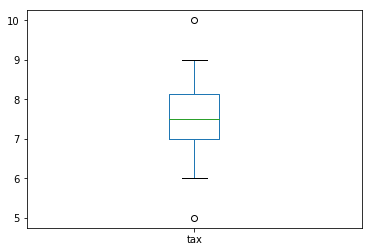

 income


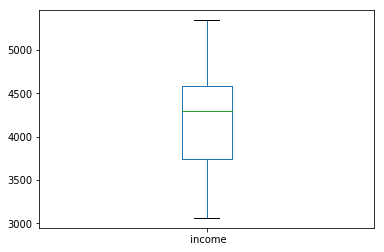

 highway


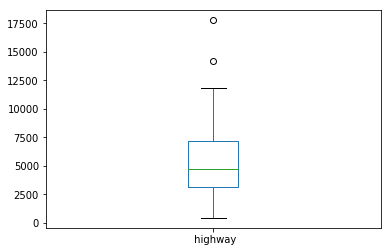

 dl


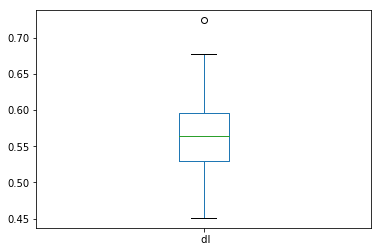

 consumption


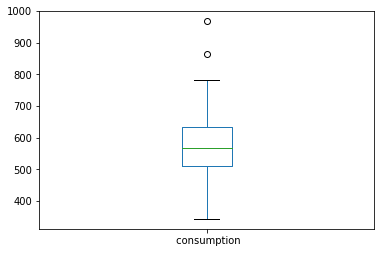

In [15]:
for i in petrol.columns:
   
    print(i)
    petrol[i].plot(kind="box")
    plt.show()

In [16]:
petrol.shape

(48, 5)

In [17]:
#removing the outliers and checking the shape
for i in petrol.columns:
    

    q1=petrol[i].quantile(0.25)
    q3=petrol[i].quantile(0.75)
    iqr=(q3-q1)

    petrol=petrol[((petrol[i]>=(q1 - 1.5 * iqr)) & (petrol[i]<= (q3 + 1.5 * iqr)))]


In [18]:
petrol.shape

(42, 5)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [19]:
petrol.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.133841,-0.443926,-0.316342,-0.463247
income,-0.133841,1.000000,-0.076862,0.296002,-0.254464
highway,-0.443926,-0.076862,1.000000,0.133983,0.215182
dl,-0.316342,0.296002,0.133983,1.000000,0.549161
consumption,-0.463247,-0.254464,0.215182,0.549161,1.000000


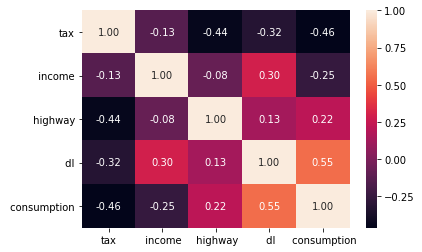

In [20]:
sb.heatmap(petrol.corr(),annot=True,fmt=".2f")

In [21]:
# from this we can infer that all the features are weekly correlated with the dependent variable

In [22]:
# from this we can see the feature to feature corelation tax is corellated with highway and dl

In [23]:
petrol.columns

Index(['tax', ' income', ' highway', ' dl', ' consumption'], dtype='object')

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [24]:
features1= petrol.drop([" consumption"," income"," highway"],axis=1)
dependent1=petrol[" consumption"]

In [25]:
petrol.isna().sum()

tax             0
 income         0
 highway        0
 dl             0
 consumption    0
dtype: int64

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [26]:
petrol_train1,petrol_test1,label_train1,label_test1=train_test_split(features1,dependent1,test_size=0.20,random_state=0)
print("shape of train dataset")
display(petrol_train1.shape)
print("shape of test dataset")
display(petrol_test1.shape)

shape of train dataset


(33, 2)

shape of test dataset


(9, 2)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [27]:
model1=LinearRegression()

In [28]:
model1.fit(petrol_train1,label_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
print("intercept",model1.intercept_)

intercept 402.86507946807825


In [30]:
print("coefficient",model1.coef_)

coefficient [-34.21593709 765.29184634]


# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [31]:
model1.score(petrol_train1,label_train1)

0.41793139298123083

In [32]:
model1.score(petrol_test1,label_test1)

0.026964209705626185

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features. Find R2 Score


In [33]:
features = petrol.drop([" consumption"],axis=1)
dependent=petrol[" consumption"]

In [34]:
petrol_train,petrol_test,label_train,label_test=train_test_split(features,dependent,test_size=0.20)
print("shape of train dataset")
display(petrol_train.shape)
print("shape of test dataset")
display(petrol_test.shape)

shape of train dataset


(33, 4)

shape of test dataset


(9, 4)

In [35]:
model=LinearRegression()

In [36]:
model.fit(petrol_train,label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
print("coefficient",model.coef_)

coefficient [-3.64116233e+01 -6.57665957e-02 -3.62732258e-03  1.02616094e+03]


In [38]:
model.score(petrol_train,label_train)

0.6184982299361401

In [39]:
model.score(petrol_test,label_test)

0.5311093515533001

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
rms=mean_squared_error(model.predict(petrol_test),label_test)
rms

4175.569633566302

# Question 9: Print the coefficients of the multilinear regression model

In [42]:
model.coef_

array([-3.64116233e+01, -6.57665957e-02, -3.62732258e-03,  1.02616094e+03])

In [43]:
model1.coef_

array([-34.21593709, 765.29184634])

In [44]:
import statsmodels.api as sm
X = sm.add_constant(petrol_train)
y = label_train
model = sm.OLS(y,X).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     11.35
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           1.34e-05
Time:                        16:48:20   Log-Likelihood:                -173.31
No. Observations:                  33   AIC:                             356.6
Df Residuals:                      28   BIC:                             364.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        559.6036    172.049      3.253      0.003     207.176     912.031
tax          -36.4116     12.238     -2.975      0.006     -61.481     -11.342
 income       -0.0658      0.018     -3.615      0.001      -0.103      -0.029
 highway      -0.0036      0.004     -0.980      0.335      -0.011       0.004
 dl         1026.1609    190.460      5.388      0.000     636.020    1416.302
==============================================================================
Omnibus:                        1.991   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                1.835
Skew:                           0.513   Prob(JB):                        0.400
Kurtosis:                       2.469   Cond. No.                     1.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer